In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Synergy\AppData\Local\conda\conda\envs\threeseven\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 15}

matplotlib.rc('font', **font)

In [3]:
dataset=pd.read_csv('data.csv')

In [4]:
df_raw=pd.read_csv('data.csv')

In [5]:
df_raw['name'][df_raw['#5g_bands'] > 0]

0               Samsung Galaxy F42 5G
1               Samsung Galaxy M52 5G
3               Samsung Galaxy M32 5G
5              Samsung Galaxy A52s 5G
6           Samsung Galaxy Z Fold3 5G
7           Samsung Galaxy Z Flip3 5G
13              Samsung Galaxy A22 5G
16           Samsung Galaxy Tab S7 FE
17              Samsung Galaxy F52 5G
18              Samsung Galaxy M42 5G
20           Samsung Galaxy Quantum 2
24              Samsung Galaxy A52 5G
31        Samsung Galaxy S21 Ultra 5G
32             Samsung Galaxy S21+ 5G
33              Samsung Galaxy S21 5G
34              Samsung Galaxy A32 5G
44           Samsung Galaxy S20 FE 5G
46              Samsung Galaxy A42 5G
49           Samsung Galaxy A51 5G UW
50          Samsung Galaxy Z Fold2 5G
51     Samsung Galaxy Note20 Ultra 5G
53           Samsung Galaxy Note20 5G
55             Samsung Galaxy Tab S7+
56              Samsung Galaxy Tab S7
57           Samsung Galaxy Z Flip 5G
62           Samsung Galaxy A71 5G UW
66          

In [6]:
df_raw.loc[dataset.index].sort_values('Size')[['name','Size']]

,name,Size
179,Samsung Galaxy Folder2,3.8
201,Samsung Z2,4.0
186,Samsung Galaxy J1 mini prime,4.0
180,Samsung Z4,4.5
211,Samsung Galaxy Xcover 3 G389F,4.5
191,Samsung Galaxy A3 (2017),4.7
166,Samsung Galaxy J2 (2017),4.7
184,Samsung Galaxy Xcover 4,5.0
192,Samsung Galaxy Grand Prime Plus,5.0
306,Motorola Moto E4,5.0


In [7]:
dataset = dataset[dataset.name.apply(lambda x: ('tab' not in x.lower()) & ('watch' not in x.lower()))]

## Data Analysis

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 506
Data columns (total 31 columns):
name                    481 non-null object
Thickness               477 non-null float64
NFC                     481 non-null int64
Brand                   481 non-null object
Battery                 481 non-null int64
OS                      481 non-null object
VERSION                 481 non-null int64
Bluetooth               481 non-null float64
PPI                     480 non-null float64
Price                   481 non-null float64
Announced               481 non-null float64
#5g_bands               481 non-null int64
#4g_bands               481 non-null int64
#3g_bands               481 non-null int64
#2g_bands               481 non-null int64
Total_bands             481 non-null int64
#cameras                481 non-null int64
nanometers              466 non-null float64
Weight                  475 non-null float64
Single-MP               426 non-null float64
F               

In [9]:
dataset.describe().to_clipboard()

In [91]:
dataset = dataset[['Thickness', 'NFC', 'Brand', 'Battery','VERSION',
           'Bluetooth', 'PPI', 'Announced',
           '#5g_bands', '#4g_bands', '#3g_bands', '#2g_bands', 'Total_bands',
           '#cameras', 'nanometers','Weight', 'Single-MP',
           'Size', 'Screen to body ratio', 'Internal','Ram',
           'Wattage', 'Wireless Charging', 'CPU_score', 'GPU_score', 'Price']]

In [92]:
non_band_cols = ['Thickness', 'NFC', 'Battery','VERSION',
           'Bluetooth', 'PPI', 'Announced',
           '#5g_bands', '#4g_bands', '#3g_bands', '#2g_bands', 'Total_bands',
           '#cameras', 'nanometers','Weight', 'Single-MP',
           'Size', 'Screen to body ratio', 'Internal','Ram',
           'Wattage', 'Wireless Charging', 'CPU_score', 'GPU_score', 'Price']

In [93]:
dataset = dataset.fillna(dataset.median())

In [94]:
dataset = pd.get_dummies(dataset)

In [95]:
dataset = dataset[dataset.Price <= 1500]

In [96]:
dataset = dataset[dataset.Weight < 500]

In [104]:
dataset = dataset[dataset.Size < 7]

In [105]:
dataset.Size.describe()

count    464.000000
mean       6.182177
std        0.539537
min        3.800000
25%        6.000000
50%        6.400000
75%        6.500000
max        6.900000
Name: Size, dtype: float64

In [106]:
dataset['#5g_bands'] > 0

0       True
1       True
2      False
3       True
4      False
       ...  
502    False
503    False
504    False
505    False
506    False
Name: #5g_bands, Length: 464, dtype: bool

In [107]:
dataset.shape

(464, 29)

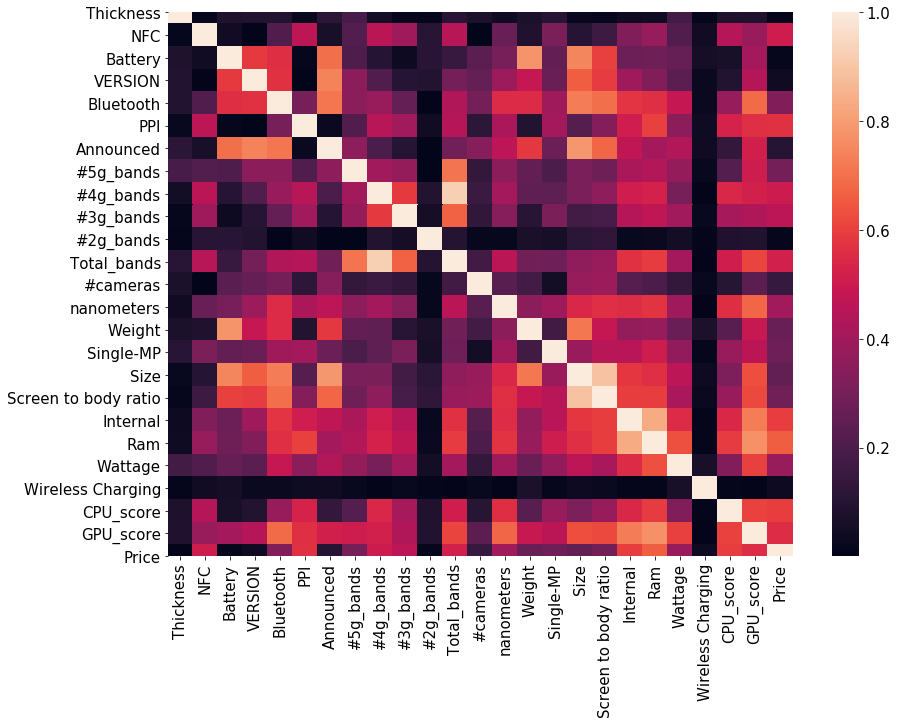

In [108]:
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap(abs(dataset[non_band_cols].corr()), ax= ax)

In [109]:
abs(dataset[non_band_cols].corr()['Price']).sort_values()

Thickness               0.006013
#2g_bands               0.012305
Battery                 0.014927
Wireless Charging       0.034517
VERSION                 0.042141
Announced               0.100725
#cameras                0.143999
Size                    0.254179
Weight                  0.266890
Single-MP               0.284279
Screen to body ratio    0.291825
#5g_bands               0.300149
Bluetooth               0.326908
Wattage                 0.380516
nanometers              0.400851
#3g_bands               0.463612
#4g_bands               0.502438
NFC                     0.505451
Total_bands             0.520540
GPU_score               0.555304
PPI                     0.567694
CPU_score               0.594687
Internal                0.596374
Ram                     0.661500
Price                   1.000000
Name: Price, dtype: float64

In [110]:
corrs = dataset[non_band_cols].corr().values.reshape(1, -1)

In [111]:
np.median(abs(corrs)[abs(corrs) < 1])

0.3120912122507671

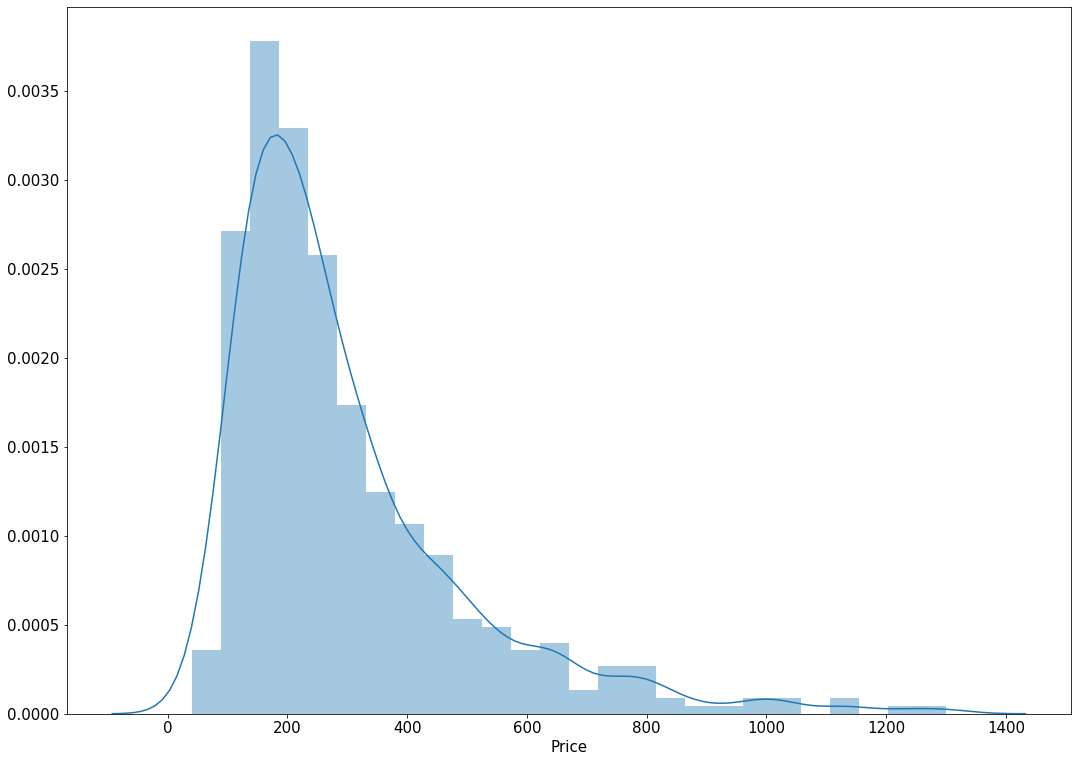

In [112]:
fig, ax = plt.subplots(figsize=(18,13)) 
sns.distplot(dataset.Price)

In [113]:
dataset.columns

Index(['Thickness', 'NFC', 'Battery', 'VERSION', 'Bluetooth', 'PPI',
       'Announced', '#5g_bands', '#4g_bands', '#3g_bands', '#2g_bands',
       'Total_bands', '#cameras', 'nanometers', 'Weight', 'Single-MP', 'Size',
       'Screen to body ratio', 'Internal', 'Ram', 'Wattage',
       'Wireless Charging', 'CPU_score', 'GPU_score', 'Price', 'Brand_Huawei',
       'Brand_Motorola', 'Brand_Realme', 'Brand_Samsung'],
      dtype='object')

In [114]:
dataset['price_bucket'] = 'low'
dataset['price_bucket'][dataset.Price < 200] = 'base'
dataset['price_bucket'][dataset.Price > 350] = 'mid'
dataset['price_bucket'][dataset.Price > 700] = 'flagship'

C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [115]:
dataset.Price.median()

235.2

In [116]:
dataset.groupby('price_bucket').apply(lambda x: pd.Series([x.Price.min(), x.Price.median(), x.Price.max()], index = ['Min', 'Median','Max' ]) )

,Min,Median,Max
price_bucket,,,
base,40.00,145.60,197.50
flagship,705.60,814.74,1299.99
low,201.60,257.60,350.00
mid,350.35,463.51,672.00


In [117]:
dataset.Price.mean()

299.3755142241382

In [118]:
dataset.price_bucket.value_counts()

base        172
low         169
mid          98
flagship     25
Name: price_bucket, dtype: int64

In [119]:
dataset['price_range'] = dataset.groupby('price_bucket').Price.median()['low']
dataset['price_range'][dataset.Price < 200] = dataset.groupby('price_bucket').Price.median()['base']
dataset['price_range'][dataset.Price > 350] = dataset.groupby('price_bucket').Price.median()['mid']
dataset['price_range'][dataset.Price > 700] = dataset.groupby('price_bucket').Price.median()['flagship']

C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

## Data Visualization & Analysis

In [120]:
# sns.pairplot(dataset[non_band_cols],hue='price_range')

### How does ram is affected by price

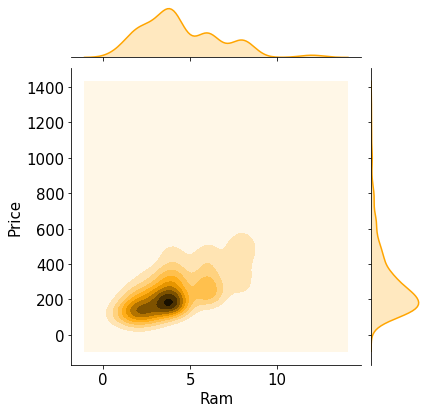

In [121]:
sns.jointplot(x='Ram',y='Price',data=dataset,color='orange',kind='kde');

### Internal Memory vs Price Range

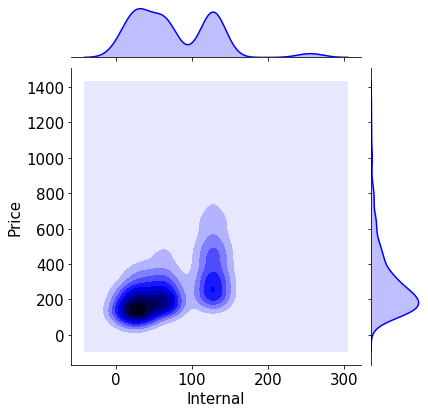

In [122]:
sns.jointplot(x='Internal',y='Price',data=dataset,color='blue',kind='kde')

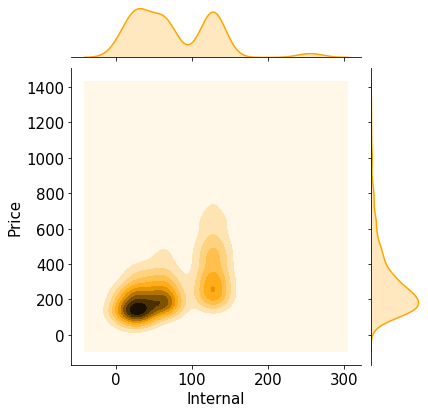

In [123]:
sns.jointplot(x='Internal',y='Price',data=dataset[dataset.Internal < 300],color='orange',kind='kde')

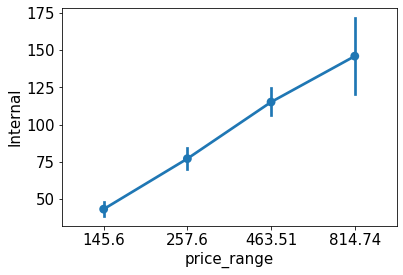

In [124]:
sns.pointplot(y="Internal", x="price_range", data=dataset)

### % of Phones which support 3G

In [ ]:
# labels = ["3G-supported",'Not supported']
# values=dataset['three_g'].value_counts().values

In [ ]:
# fig1, ax1 = plt.subplots()
# ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
# plt.show()


### % of Phones which support 5G


In [125]:
(dataset['#5g_bands'] > 0).value_counts()

False    361
True     103
Name: #5g_bands, dtype: int64

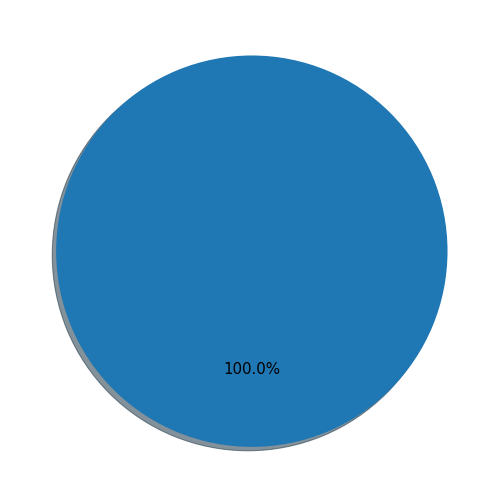

In [126]:
labels4g = [True,False]
values4g = (dataset['#4g_bands'] > 0).value_counts().values
fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(values4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

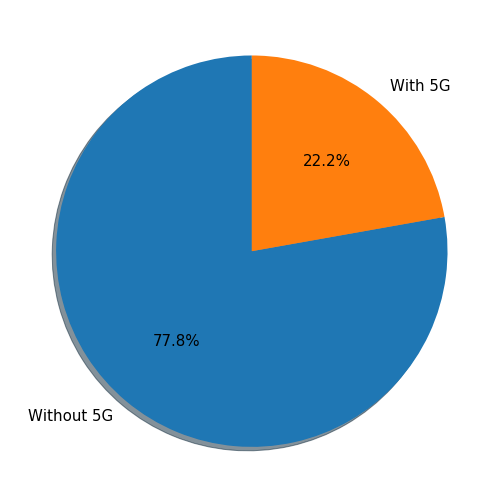

In [127]:
labels4g = [True,False]
values4g = (dataset['#5g_bands'] > 0).value_counts().values
fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(values4g, labels=['Without 5G', 'With 5G'], autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [128]:
dataset['5G_available'] = dataset['#5g_bands'] > 0

In [129]:
dataset['Announced_year'] = dataset['Announced'].astype(int)

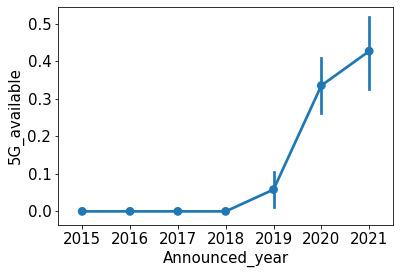

In [130]:
sns.pointplot(y="5G_available", x="Announced_year", data=dataset)

### Battery power vs Price Range

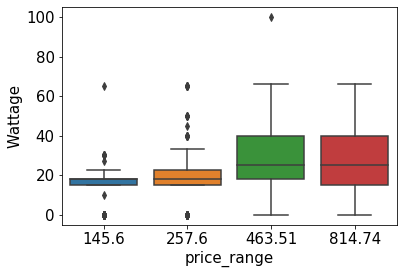

In [131]:
sns.boxplot(x="price_range", y="Wattage", data=dataset)

### No of Phones vs Camera megapixels of front and primary camera

In [ ]:
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

### Mobile Weght vs Price range

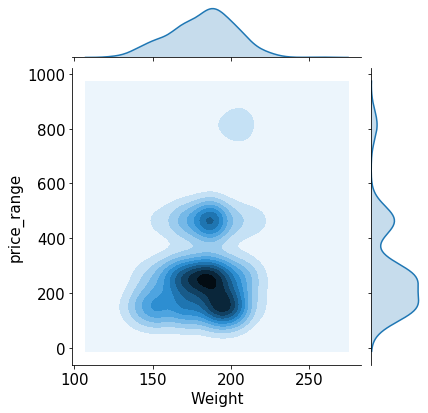

In [132]:
sns.jointplot(x='Weight',y='price_range',data=dataset,kind='kde');

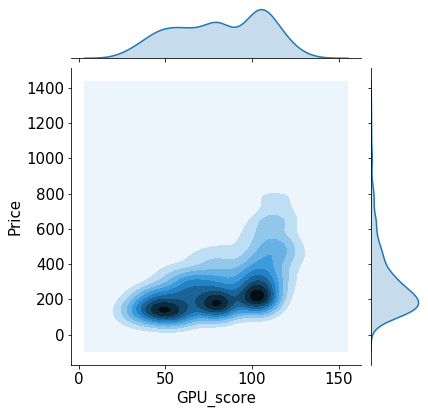

In [133]:
sns.jointplot(x='GPU_score',y='Price',data=dataset,kind='kde');

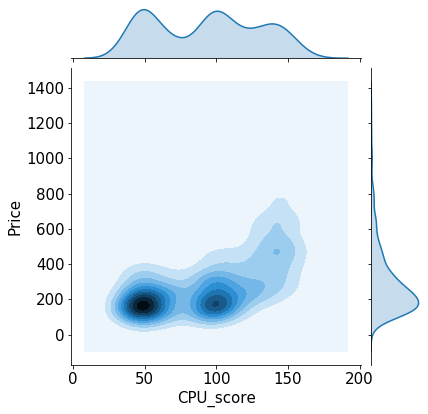

In [134]:
sns.jointplot(x='CPU_score',y='Price',data=dataset,kind='kde');

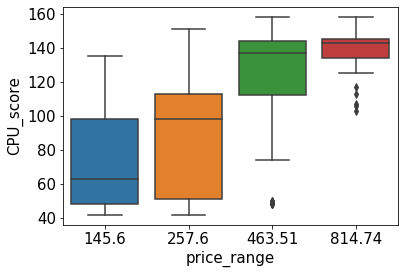

In [135]:
sns.boxplot(x="price_range", y="CPU_score", data=dataset)

## X & Y array

In [145]:
dataset.columns[['price' in i or 'Price' in i for i in dataset.columns]]

Index(['Price', 'price_bucket', 'price_range'], dtype='object')

In [146]:
X=dataset.drop(dataset.columns[['price' in i or 'Price' in i for i in dataset.columns]],axis=1)

In [161]:
y=dataset['Price']
y_class = dataset['price_bucket']

## Splitting the data

In [148]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [165]:
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.20, random_state=101)

## Creating & Training Linear Regression Model

In [150]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [151]:
lm.fit(X_train,y_train)

LinearRegression()

In [152]:
lm.score(X_test,y_test)

0.5008174918488549

## Creating & Training KNN Model

In [167]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train_class)

KNeighborsClassifier(n_neighbors=10)

In [168]:
knn.score(X_test,y_test_class)

C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.5591397849462365

### Elbow Method For optimum value of K

In [169]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train_class)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test_class))

C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have v

Text(0, 0.5, 'Error Rate')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


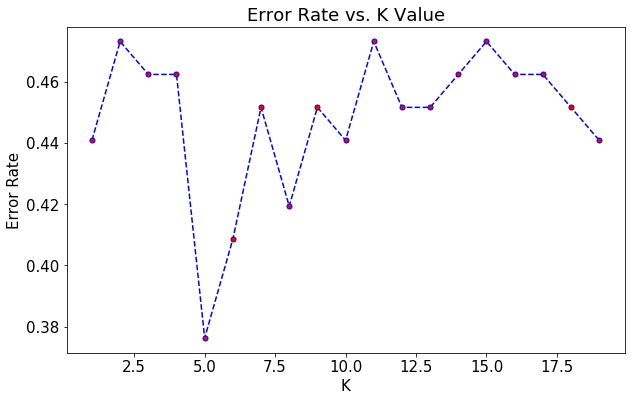

In [170]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Creating & Training Logistic Regression Model

In [171]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()


In [172]:
logmodel.fit(X_train,y_train_class)

C:\Users\Synergy\Anaconda3\envs\t2\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [173]:
logmodel.score(X_test,y_test_class)

0.6236559139784946

## Creating & Training Decision Tree Model

In [174]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [175]:
dtree.fit(X_train,y_train_class)

DecisionTreeClassifier()

In [176]:
dtree.score(X_test,y_test_class)

0.5806451612903226

## Tree Visualization

In [ ]:
feature_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

In [ ]:
#For tree Visualization as kaggle does't support pydotplus just install the pydotplus in your systems's conda terminal
'''
import pydotplus as pydot

from IPython.display import Image

from sklearn.externals.six import StringIO

dot_data = StringIO()

tree.export_graphviz(dtree, out_file=dot_data,feature_names=feature_names)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())'''

In [ ]:
#Another way
'''from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())'''  

## Creating & Training Random Tree Model

In [193]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train_class)

RandomForestClassifier()

In [194]:
rfc.score(X_test,y_test_class)

0.6881720430107527

In [188]:
preds_tr = rfc.predict(X_train)
preds_ts = rfc.predict(X_test)
# print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
# print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train_class), r2_score(preds_ts,y_test_class))

ValueError: could not convert string to float: 'base'

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, accuracy_score


In [159]:
rf = RandomForestRegressor()
# rf.fit(X = X_scaled_tr, y = y_train)
rf.fit(X = X_train, y = y_train)

preds_tr = rf.predict(X_train)
preds_ts = rf.predict(X_test)
print((abs(preds_tr - y_train)/y_train).mean(), (abs(preds_ts - y_test)/y_test).mean())
print(np.median(abs(preds_tr - y_train)/y_train), np.median(abs(preds_ts - y_test)/y_test))
print(r2_score(preds_tr,y_train), r2_score(preds_ts,y_test))

0.11079282936949557 0.24364654583821993
0.07660810888252126 0.16249859022556404
0.9326656729582623 -0.07792356437528469


In [190]:
rf.feature_importances_

array([0.03191683, 0.00969689, 0.02101898, 0.00462569, 0.00338967,
       0.10450775, 0.01825479, 0.00792169, 0.04518976, 0.00820291,
       0.00285343, 0.02152979, 0.01036976, 0.00687849, 0.06809543,
       0.02214475, 0.01204557, 0.04176366, 0.0076582 , 0.05372842,
       0.00852344, 0.00049206, 0.38288689, 0.08867109, 0.00749015,
       0.00287226, 0.0009056 , 0.00145135, 0.00130674, 0.00360797])

<BarContainer object of 30 artists>

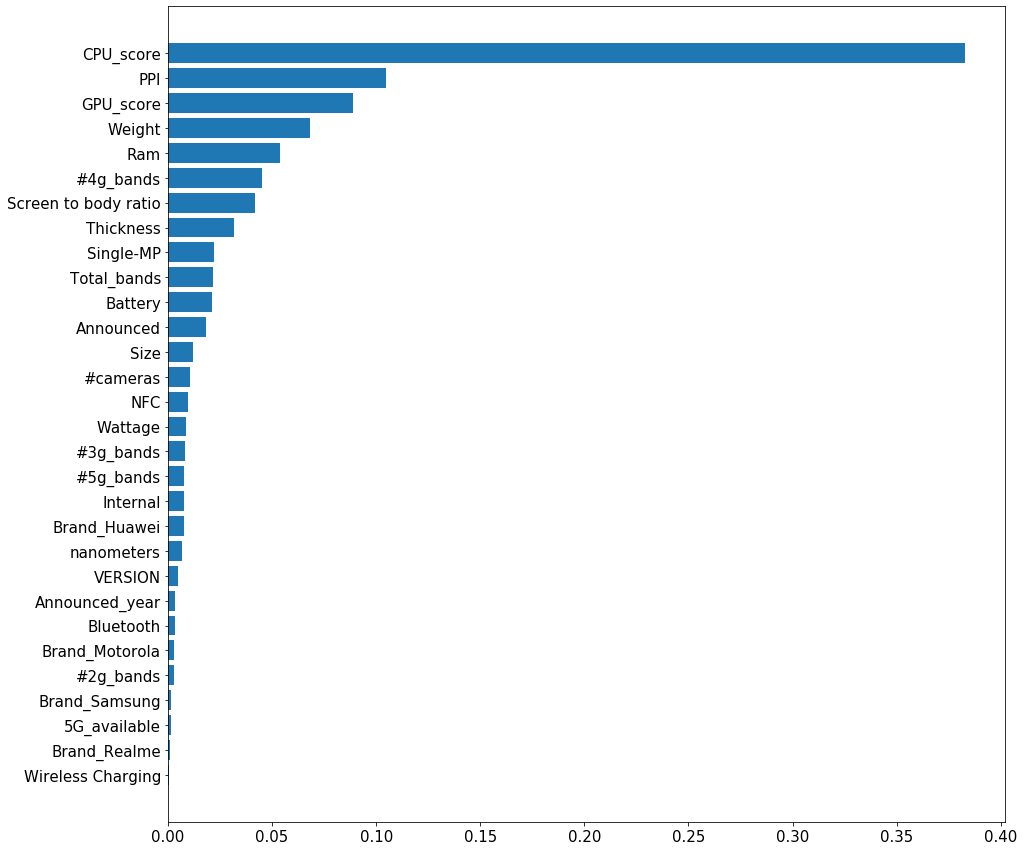

In [192]:
plt.subplots(figsize=(15, 15))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns.values[sorted_idx], rf.feature_importances_[sorted_idx], height=0.8, align='center')

# Conclusion: KNN & Linear Regression performed the best

## RESULT : Linear Regression

In [ ]:
y_pred=lm.predict(X_test)


In [ ]:
plt.scatter(y_test,y_pred)


In [ ]:
plt.plot(y_test,y_pred)

## RESULT: KNN

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))

In [ ]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)


# Price prediction of Test.csv Using KNN for Prediction

### Import test.csv

In [ ]:
data_test=pd.read_csv('../input/test.csv')

In [ ]:
data_test.head()

In [ ]:
data_test=data_test.drop('id',axis=1)

In [ ]:
data_test.head()

# Model

In [ ]:
predicted_price=knn.predict(data_test)

# Predicted Price Range

In [ ]:
predicted_price

# Adding Predicted price to test.csv

In [ ]:
data_test['price_range']=predicted_price

In [ ]:
data_test